In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data = "data/city_data.csv"
ride_data = "data/ride_data.csv"

# Read the City and Ride Data

# Combine the data into a single dataset

# Display the data table for preview


In [22]:
city_data_df = pd.read_csv(city_data)
city_data_df.head()

ride_data_df = pd.read_csv(ride_data)
ride_data_df.head()

pyber_data = pd.merge(city_data_df, ride_data_df, on="city")
pyber_data.head()

# calculate data for graphs

average_fare = pyber_data.groupby('city')['fare'].mean()
total_rides = pyber_data.groupby('city')['ride_id'].count()
total_drivers = pyber_data.groupby('city')['driver_count'].count()
city_type = city_data_df.set_index('city')['type']
city_type.value_counts()

#create new df for above data

pyber_cities = pd.DataFrame({"Average Fare per City":average_fare,
                "Number of Rides": total_rides,
                "Number of Drivers": total_drivers,
                "City Type": city_type
})
pyber_cities.head()

,Average Fare per City,Number of Rides,Number of Drivers,City Type
Amandaburgh,24.641667,18,18,Urban
Barajasview,25.332273,22,22,Urban
Barronchester,36.422500,16,16,Suburban
Bethanyland,32.956111,18,18,Suburban
Bradshawfurt,40.064000,10,10,Rural


## Bubble Plot of Ride Sharing Data

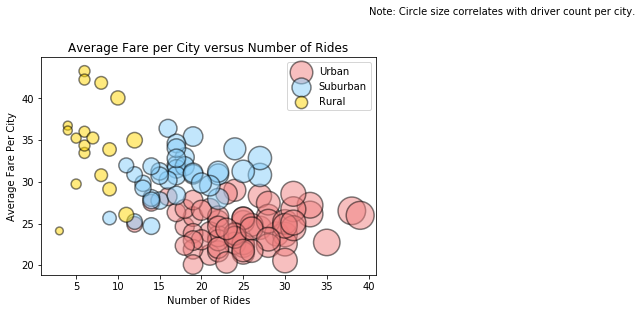

In [45]:
# Obtain the x and y coordinates for each of the three city types

#Urban
urban = pyber_cities.loc[pyber_cities["City Type"]== "Urban"]

#suburban
suburban = pyber_cities.loc[pyber_cities["City Type"]== "Suburban"]

#rural
rural = pyber_cities.loc[pyber_cities["City Type"]== "Rural"]

# Build the scatter plots for each city types

#Urban
plt.scatter(urban["Number of Rides"], urban["Average Fare per City"], color = "lightcoral", edgecolors="black", s = urban["Number of Drivers"]*20, label = "Urban", alpha = 0.5, linewidth = 1.5)

#Suburban
plt.scatter(suburban["Number of Rides"], suburban["Average Fare per City"], color = "lightskyblue", edgecolors ="black", s = suburban["Number of Drivers"]*20, label = "Suburban", alpha = 0.5, linewidth = 1.5)

#Rural
plt.scatter(rural["Number of Rides"], rural["Average Fare per City"], color = "gold", edgecolors = "black", s = rural["Number of Drivers"]*20, label = "Rural", alpha = 0.5, linewidth = 1.5)

# Incorporate the other graph properties

plt.title("Average Fare per City versus Number of Rides")
plt.xlabel("Number of Rides")
plt.ylabel("Average Fare Per City")

# Incorporate a text label regarding circle size

plt.text(40, 50,"Note: Circle size correlates with driver count per city.")

# Create a legend

plt.legend(loc= "upper right")

# Save Figure
plt.show()

In [42]:
# Show plot
plt.show()

## Total Fares by City Type

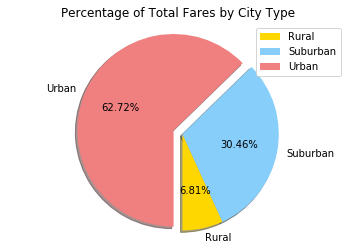

In [89]:
# Calculate Type Percents

city_fare_pie = pyber_data.groupby(['type'])['fare'].sum()
city_fare_pie.index

# Build Pie Chart

#Set the colors of each section of the pie chart.
colors = ["gold", "lightskyblue", "lightcoral"]

#Only explode the third section of the pie chart.

explode = (0,0, 0.1)

#Create the pie chart.
plt.pie(city_fare_pie, labels = city_fare_pie.index, autopct = "%1.2f%%", colors = colors, explode = explode, shadow = True, startangle = 270)

#Tell Matplotlib that we want a pie chart with equal axes.
plt.axis("equal")

#Add the legend.
plt.legend(loc = "upper right")

plt.title('Percentage of Total Fares by City Type')

#Show the chart.
plt.show()

# Save Figure


In [49]:
# Show Figure
plt.show()

## Total Rides by City Type

<function matplotlib.pyplot.show(*args, **kw)>

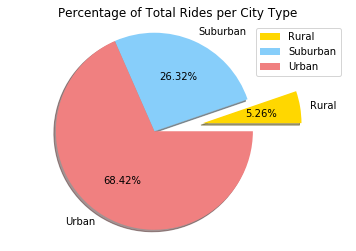

In [98]:
# Calculate Ride Percents

city_rides_pie = pyber_data.groupby(["type"])["ride_id"].count()
city_rides_pie

# Build Pie Chart
city_rides_pie.index

colors = ["gold","lightskyblue","lightcoral"]

explode = (0.5,0,0)

plt.pie(city_rides_pie, labels = city_rides_pie.index, autopct = "%1.2f%%", colors = colors, explode = explode, shadow = True)

plt.axis("equal")

plt.legend(loc = "upper right")

plt.title('Percentage of Total Rides by City Type')

plt.show
# Save Figure


In [91]:
# Show Figure
plt.show()

## Total Drivers by City Type

<function matplotlib.pyplot.show(*args, **kw)>

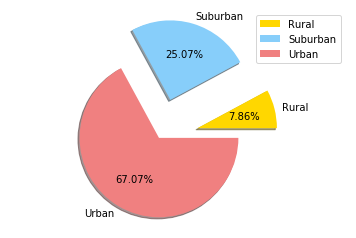

In [104]:
# Calculate Ride Percents

city_drivers_pie = pyber_data.groupby(["type"])["driver_count"].mean()
city_drivers_pie

# Build Pie Chart
city_drivers_pie.index

colors = ["gold","lightskyblue","lightcoral"]

explode = (0.5,0.5,0)

plt.pie(city_drivers_pie, labels = city_drivers_pie.index, autopct = "%1.2f%%", colors = colors, explode = explode, shadow = True)

plt.axis("equal")

plt.legend(loc = "upper right")

plt.title('Percentage of Total Drivers by City Type')

plt.show
# Save Figure


In [105]:
# Show Figure
plt.show()